In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
df_author = pd.read_json('lighter_authors.json',lines= True)

In [3]:
df_author.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [4]:
df_books = pd.read_json(r'lighter_books.json', lines=True, nrows=150000)

columns_to_drop = ['isbn', 'isbn13', 'asin', 'edition_information', 'publisher', 'series_id', 'series_name', 'series_position', 'description', 'shelves']

df_books.drop(columns=columns_to_drop, inplace=True)
df_books = df_books[df_books['title'].notna()]
df_books = df_books[df_books['ratings_count'] >= 0]
df_books = df_books[df_books['text_reviews_count'] >= 0]

# convert 'num_pages' to integer, replacing empty strings with NaN
df_books['num_pages'] = df_books['num_pages'].replace('', np.nan).astype(float)

# filter out rows with 'num_pages' less than 0
df_books = df_books[df_books['num_pages'] >= 0]

# print information about the 'df_books' DataFrame
print(df_books.head())

   id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   

                                             authors   author_name  author_id  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
2                                               None  J.K. Rowling    1077326   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   

   work_id language  average_rating  \
0  2809203      eng            4.50   
1  4640799      eng            4.48   
2  6231171      eng            4.43

In [5]:
print(df_books.columns)

Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id',
       'language', 'average_rating', 'rating_dist', 'ratings_count',
       'text_reviews_count', 'publication_date', 'original_publication_date',
       'format', 'image_url', 'num_pages'],
      dtype='object')


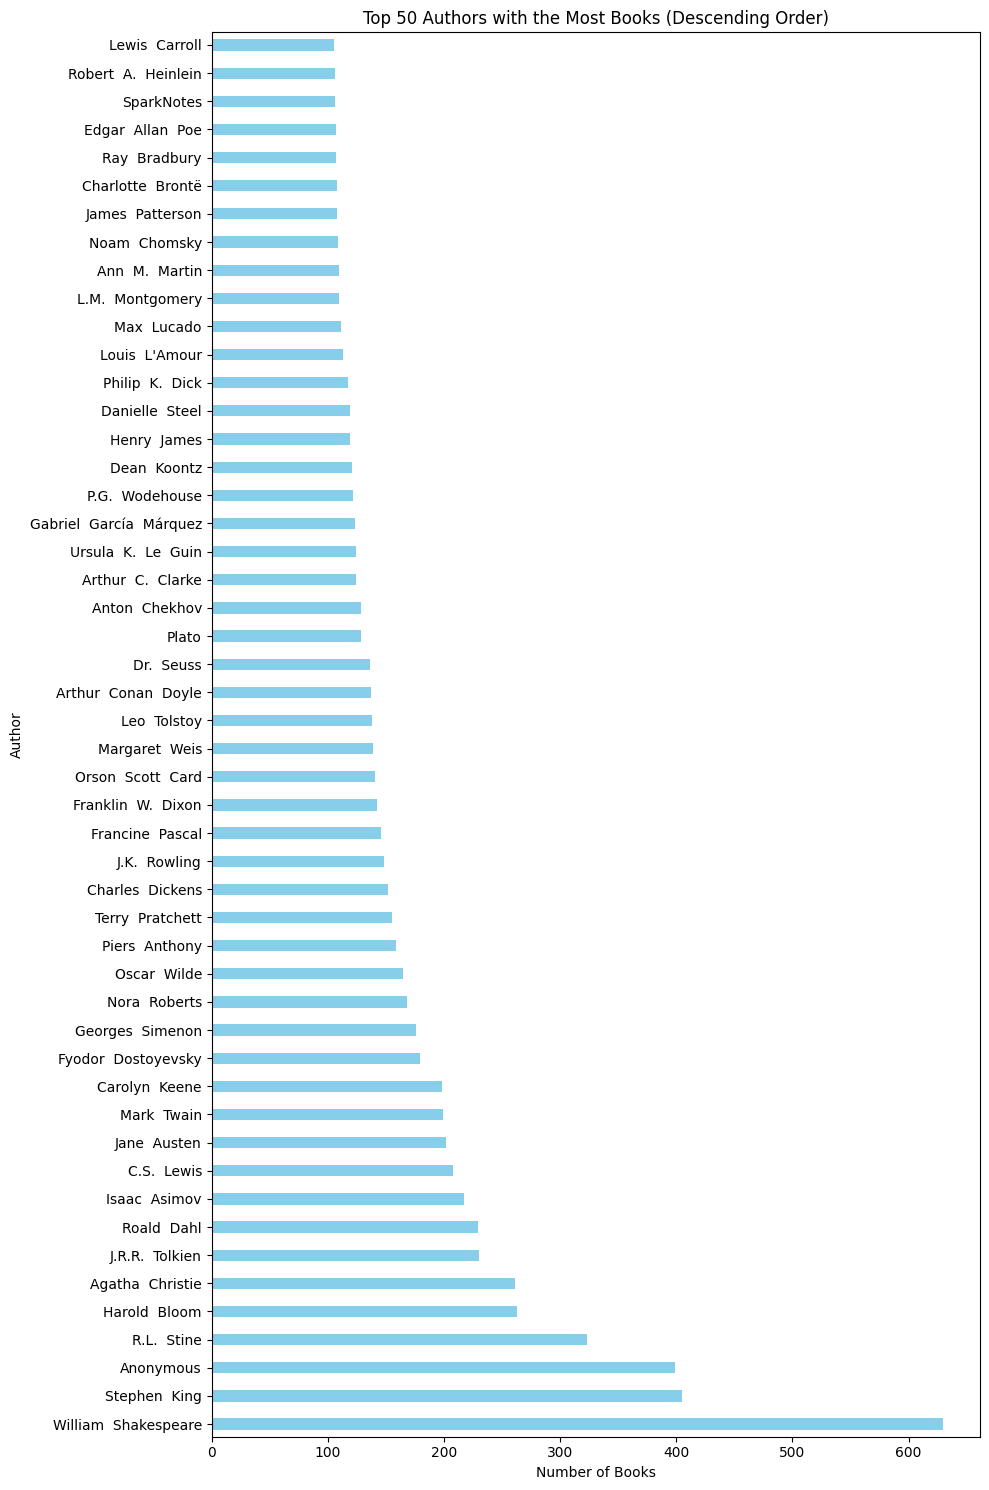

In [6]:
#RQ 2.1
author_counts = df_books['author_name'].value_counts()
# When we list the number of books by all authors, the graph becomes unreadable due to the large number of authors, so I limited the number of authors to 50. 
top_50_authors = author_counts.head(50)

top_50_authors.index = [author.replace(' ', '  ') for author in top_50_authors.index]  # Boşlukları iki katına çıkar
bar_width = 0.4 

plt.figure(figsize=(10, 15))

ax = top_50_authors.plot(kind='barh', color='skyblue', width=bar_width)
ax.set_title('Top 50 Authors with the Most Books (Descending Order)')
ax.set_xlabel('Number of Books')
ax.set_ylabel('Author')
plt.tight_layout()
plt.show()


In [7]:
#RQ 2.2

book_with_highest_reviews = df_books['average_rating'].idxmax()

book = df_books.loc[book_with_highest_reviews]['title']

print(book)

Bernie Mac


In [8]:
#RQ 2.3

# Sort the DataFrame by 'average_rating' in descending order (top 10 best)
top_10_best_books = df_books.sort_values(by='average_rating', ascending=False).head(10)

# Sort the DataFrame by 'average_rating' in ascending order (top 10 worst)
top_10_worst_books = df_books.sort_values(by='average_rating', ascending=True).head(10)

# Display the top 10 best books
print("Top 10 Best Books:")
print(top_10_best_books[['title', 'authors', 'average_rating']])

# Display the top 10 worst books
print("\nTop 10 Worst Books:")
print(top_10_worst_books[['title', 'authors', 'average_rating']])


Top 10 Best Books:
                                                    title  \
87861   Selected Works of Jawaharlal Nehru, 2nd Series...   
38593                   Mean Old Mickle & Smack-Biff-Thud   
89223                                  The Magpie's Story   
17160   Sermons, Newly Discovered (Works of Saint Augu...   
116042           Birds of Prey: A Look at Daytime Raptors   
50338      Economic Development and the Division of Labor   
129196               Yr Hen Iaith: Studies in Early Welsh   
27251   Orville And Wilbur Wright: Two Brothers, One D...   
88921                                         James Welch   
129444                         Get Sad When Somebody Dies   

                                                  authors  average_rating  
87861   [{'id': '89095', 'name': 'Jawaharlal Nehru', '...             5.0  
38593                                                None             5.0  
89223   [{'id': '35085', 'name': 'Nick Butterworth', '...             5.0  
17160

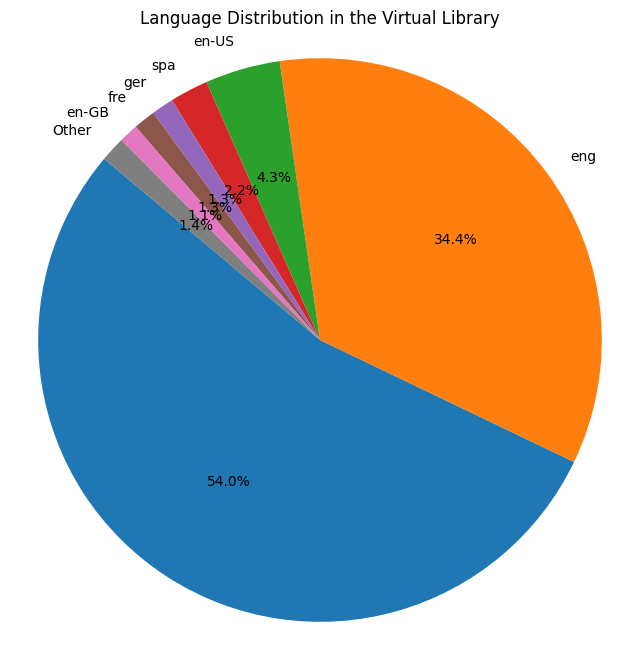

In [9]:
#RQ 2.4
language_counts = df_books['language'].value_counts()

# Calculate the total count of books
total_books = len(df_books)

# Calculate the threshold count (1% of the total)
threshold = 0.01 * total_books

# Filter out languages below the threshold and count them as "Other"
other_count = language_counts[language_counts < threshold].sum()
language_counts = language_counts[language_counts >= threshold]
language_counts['Other'] = other_count

# Create a pie chart to summarize language distribution
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution in the Virtual Library')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [10]:
#RQ 2.5
books_with_more_than_250_pages = df_books[df_books['num_pages'] > 250]
num_books_with_more_than_250_pages = len(books_with_more_than_250_pages)

print(f'The number of books with more than 250 pages is: {num_books_with_more_than_250_pages}')


The number of books with more than 250 pages is: 59799


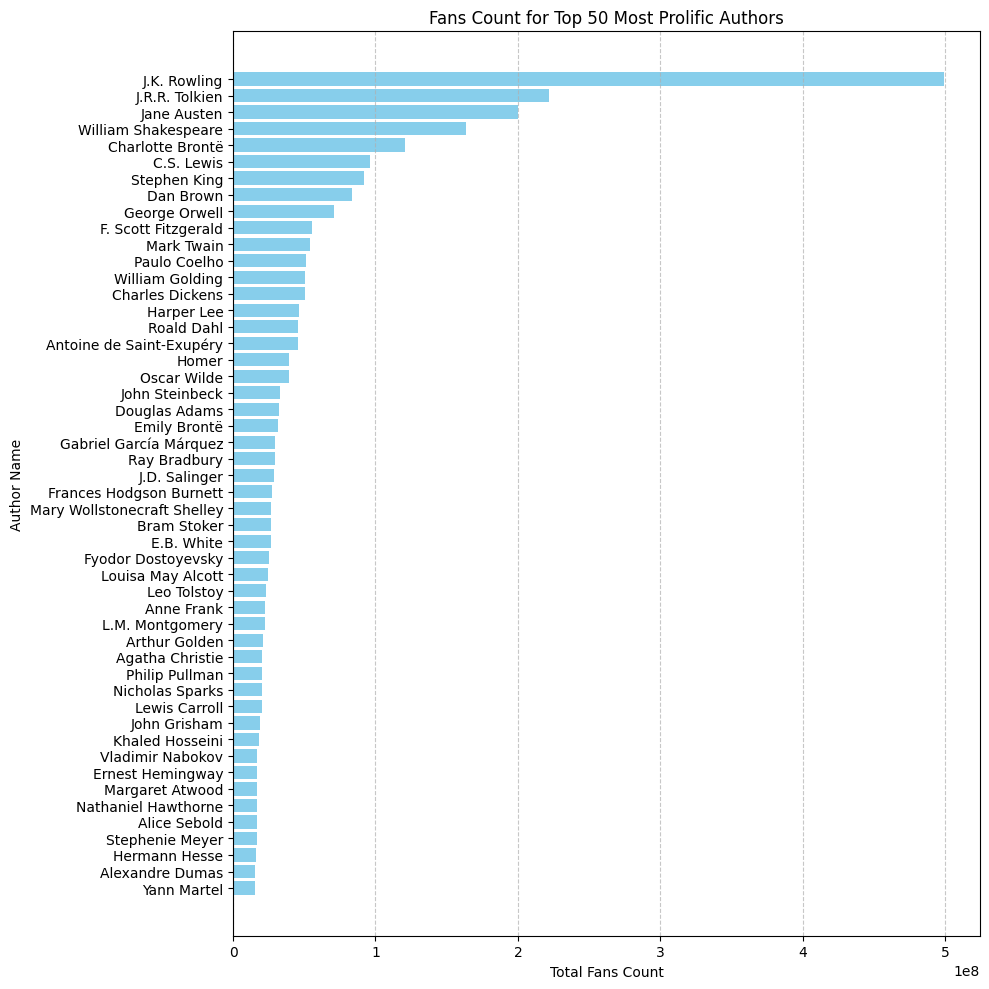

In [11]:
#RQ 2.6
author_fans_counts = df_books.groupby('author_name')['ratings_count'].sum()

# Select the top 50 authors with the most total fans
top_50_authors = author_fans_counts.nlargest(50)

# Filter the dataset to include only books by the top 50 authors
books_by_top_authors = df_books[df_books['author_name'].isin(top_50_authors.index)]

# Create a bar plot to display the author's name and their total fans count
plt.figure(figsize=(10, 10))
plt.barh(top_50_authors.index, top_50_authors.values, color='skyblue')
plt.title('Fans Count for Top 50 Most Prolific Authors')
plt.xlabel('Total Fans Count')
plt.ylabel('Author Name')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()